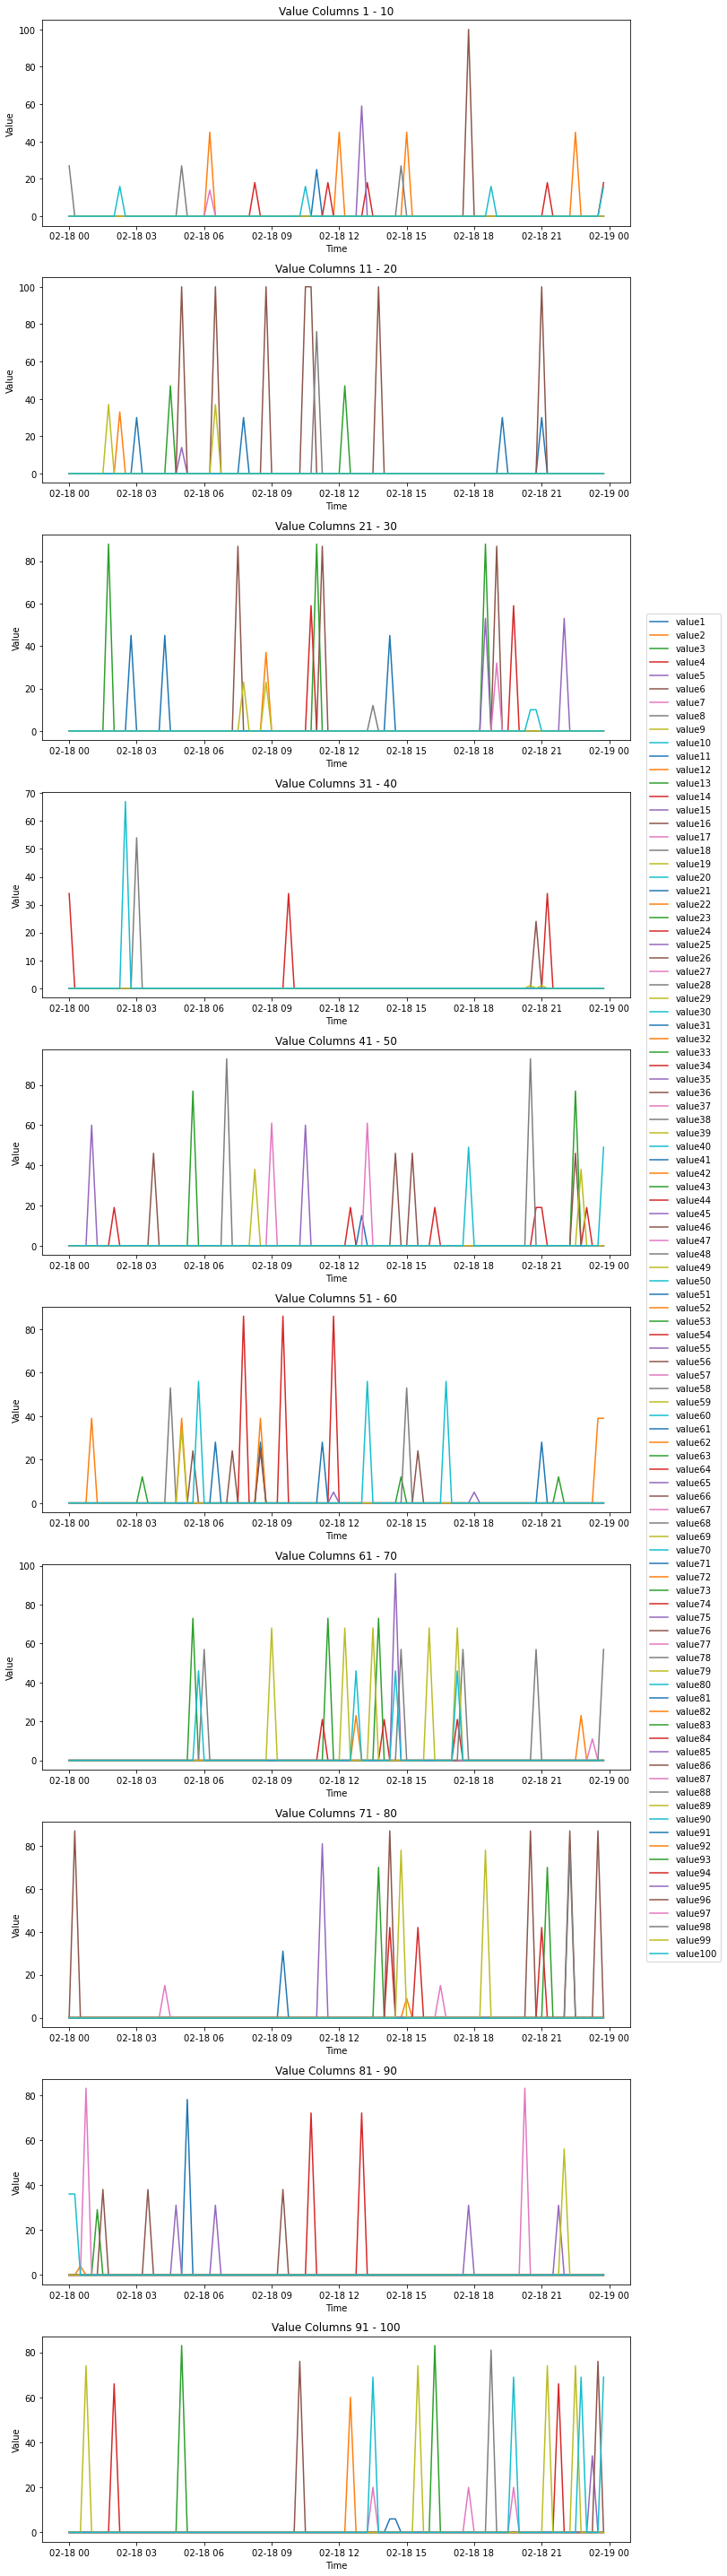

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create a time range at 15 minute intervals for one day
time_range = pd.date_range(start='2023-02-18 00:00:00', end='2023-02-18 23:45:00', freq='15min')

# Create a dictionary to store the columns
columns = {'time': time_range}

# Create 98 additional columns with random integer values between 1 and 100
for i in range(1, 101):
    column_name = 'value' + str(i)
    values = np.random.choice([0, np.random.randint(1, 101)], size=len(time_range), p=[0.98, 0.02])
    columns[column_name] = values

# Create a DataFrame with the time series column and the additional value columns
df = pd.DataFrame(columns)

# Set the time column as the DataFrame index
df.set_index('time', inplace=True)

# Create 10 subplots, with each subplot showing 10 of the value columns
fig, axs = plt.subplots(10, 1, figsize=(10, 40))
axs = axs.flatten()

# Loop through each set of 10 value columns and create a line chart for each column
for i in range(0, 98, 10):
    columns_to_plot = ['value'+str(j+1) for j in range(i, i+10)]
    for j, column_name in enumerate(columns_to_plot):
        axs[i//10].plot(df.index, df[column_name], label=column_name)
        axs[i//10].set_title('Value Columns {} - {}'.format(i+1, i+10))
        axs[i//10].set_xlabel('Time')
        axs[i//10].set_ylabel('Value')

# Add a legend to the chart
fig.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Adjust the spacing between subplots
fig.tight_layout()

# Display the chart
plt.show()

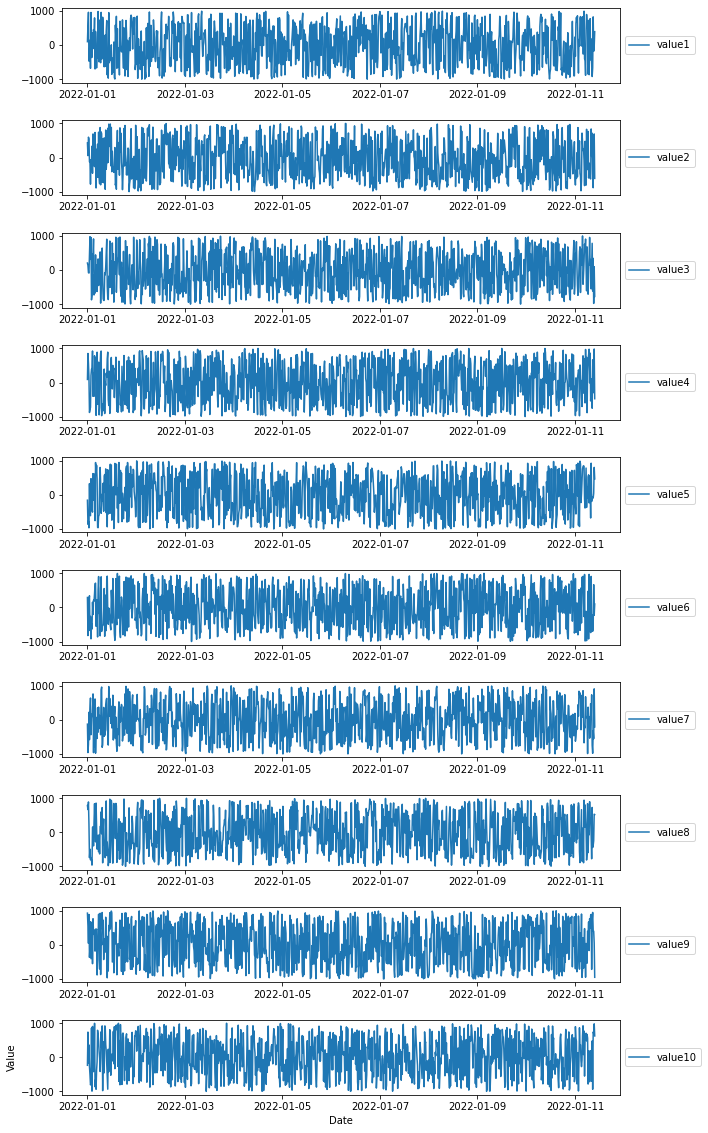

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Generate sample data
np.random.seed(0)
dates = pd.date_range('2022-01-01', periods=1000, freq='15T')
values = np.random.uniform(-1000, 1000, size=(1000, 10))
df = pd.DataFrame(values, index=dates, columns=[f'value{i}' for i in range(1, 11)])

# Create subplots
fig, axs = plt.subplots(nrows=10, ncols=1, figsize=(10, 20))

# Plot each column in a separate subplot
for i, col in enumerate(df.columns):
    ax = axs[i]
    ax.plot(df.index, df[col], label=col)
    ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Add x- and y-axis labels to the last subplot
axs[-1].set_xlabel('Date')
axs[-1].set_ylabel('Value')

# Adjust spacing between subplots and display
fig.subplots_adjust(hspace=0.5)
plt.show()